<a href="https://colab.research.google.com/github/Ayush-rawat7/Road-Lane-Detection-using-CNN/blob/main/Lane_detection_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Lane Detection using Convolutional Neural Networking (CNN)**

#**Project Workflow**

**1.Set Up the Environment:**

Install necessary libraries like TensorFlow/Keras and OpenCV.

Mount Google Drive (if needed) to store datasets and models.

**2. Prepare the Dataset:**

Use a labeled dataset for lane detection (e.g., Tusimple Lane Detection Dataset ).

The dataset should include road images and corresponding lane masks (binary images where lanes are marked as white pixels).

**3. Preprocess the Data:**

Resize images and masks to a fixed size.

Normalize pixel values between 0 and 1.

Split the dataset into training, validation, and testing sets.

**4. Build the CNN Model:**

Design a CNN architecture for semantic segmentation (e.g., U-Net or a custom model).

The model should take an image as input and output a binary mask highlighting lane lines.

**5. Train the Model:**

Compile the model with appropriate loss function (e.g., binary cross-entropy) and optimizer (e.g., Adam).

Train the model on the training set and validate it on the validation set.

**6. Evaluate the Model:**

Test the model on unseen data.

**7. Use the Model for Inference:**

Apply the trained model to detect lanes in new images or video feeds.

**What is convolution?**

**To Teach Machines To See Images**

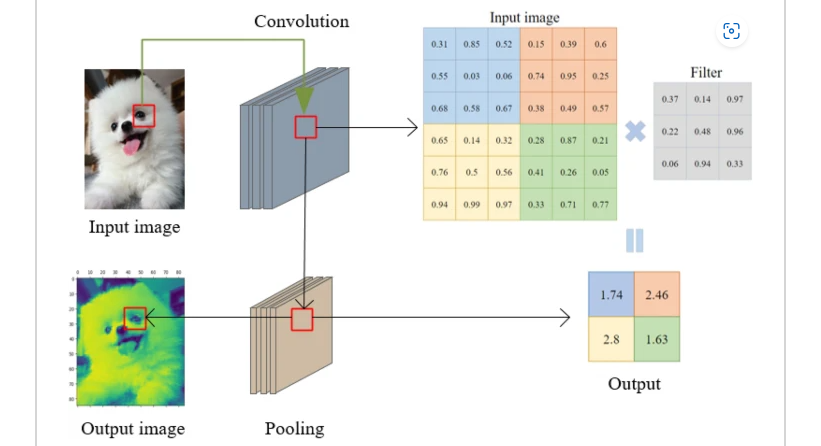

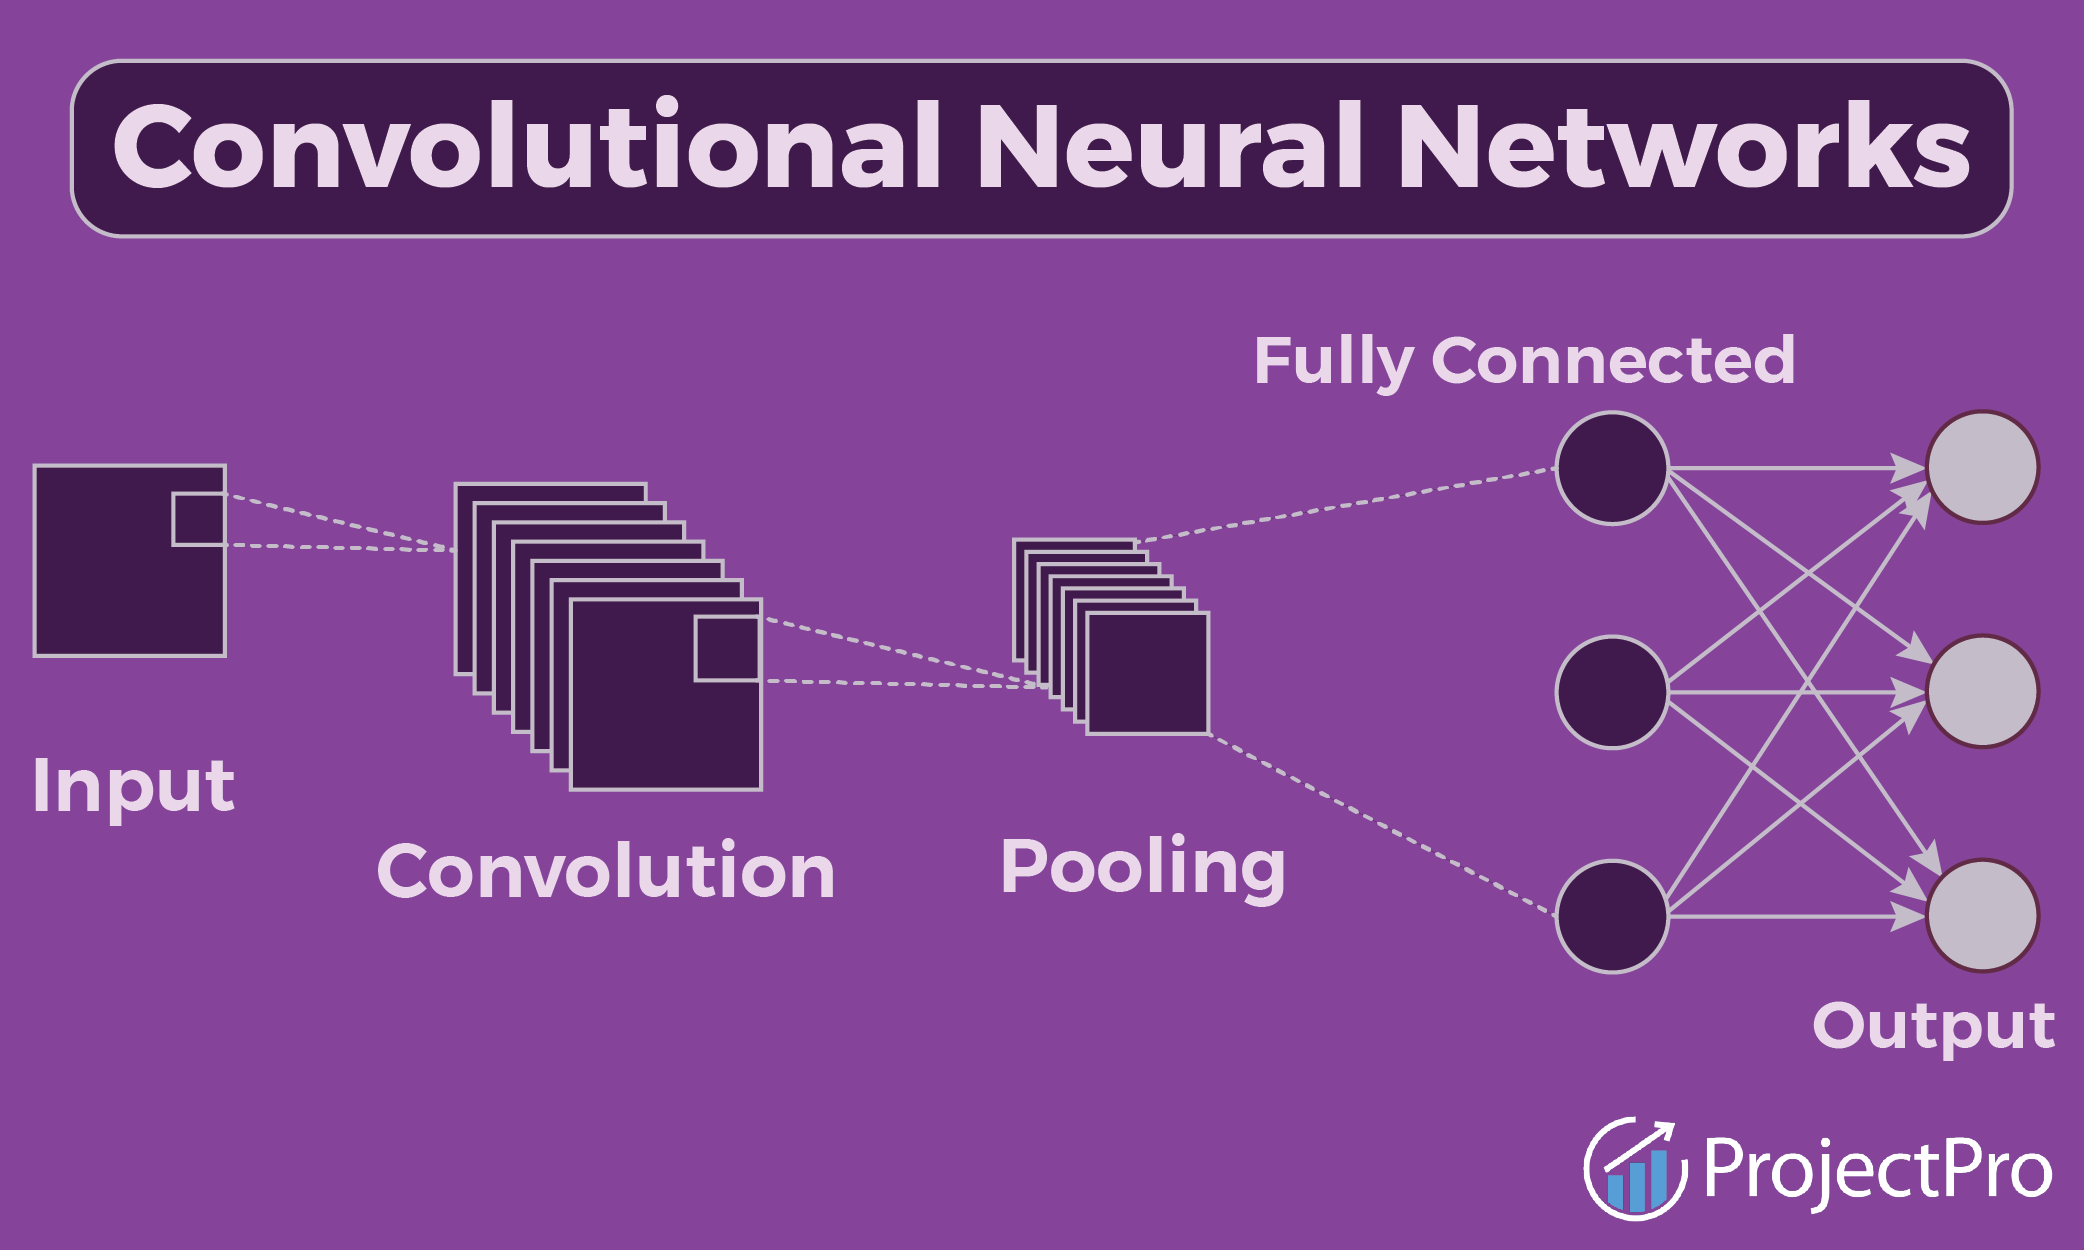

#**Required Modules and Libraries**

In [ ]:
!pip install tensorflow opencv-python-headless

#tensorflow- By google and used extensively in deep learning tasks, including image recognition.
#opencv-python-headless- for computer vision tasks in Python. In headless version GUI is not needed.

**1. Install Required Libraries**

In [ ]:
!pip install tensorflow opencv-python numpy matplotlib

**2. Import Libraries**

In [ ]:
import os   #used for tasks like managing file paths for images and masks in the dataset.
import cv2  #used for reading, processing, and manipulating images
import numpy as np
import matplotlib.pyplot as plt


#**2. Load and Preprocess Dataset**

**Image**
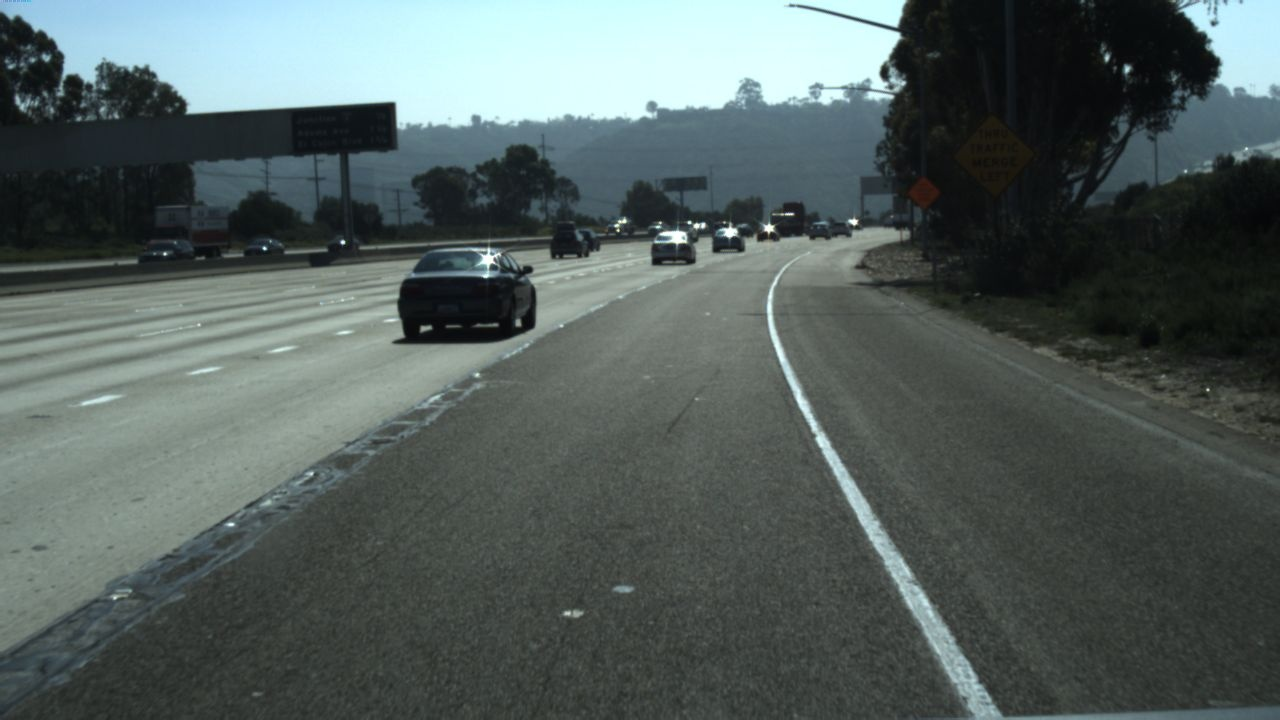

**Mask of the Image**

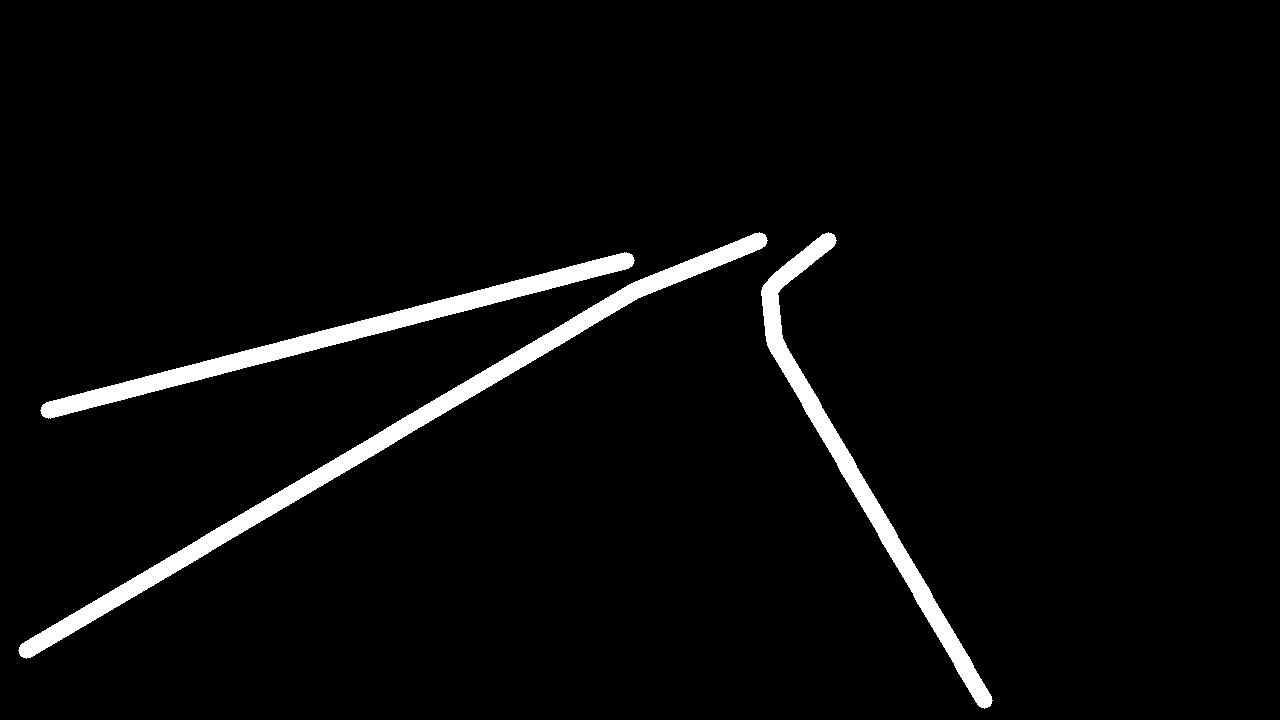

In [ ]:
dataset_path1= '/content/drive/MyDrive/Colab Notebooks/Lane Detection with CNN/frames'
dataset_path2= '/content/drive/MyDrive/Colab Notebooks/Lane Detection with CNN/laneMasks'

In [ ]:
# Define Image and Mask Directories
image_dir = os.path.join(dataset_path1)  # Folder containing images
mask_dir = os.path.join(dataset_path2)   # Folder containing masks

#define a function to load, resize, and normalize the images and masks
# Load images and masks
def load_data(image_dir, mask_dir, num_samples=1000):
    images = [] #Initialization
    masks = []  #Initialization

    # Get list of image and mask files
    image_files = sorted(os.listdir(image_dir))[:num_samples]
    mask_files = sorted(os.listdir(mask_dir))[:num_samples]

    #The code iterates through each image and corresponding mask file using zip.

    for img_file, mask_file in zip(image_files, mask_files):
        # Load image
        image_path = os.path.join(image_dir, img_file)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (128, 128))  # Resize to 128x128 pixels
        image = image / 255.0  # Normalize to [0, 1]

        # Load mask
        mask_path = os.path.join(mask_dir, mask_file)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, (128, 128))  # Resize to 128x128 pixels
        mask = (mask > 0).astype(np.uint8)  # Convert to binary mask

        images.append(image)
        masks.append(mask)

    return np.array(images), np.array(masks)



In [ ]:
# Load dataset
X_train, y_train = load_data(image_dir, mask_dir, num_samples=1000)

# Check shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

#  the load_data function:

# 1.Read images and masks from the given folders.
# 2.Preprocess them.
# 3.Store the images in X_train and the masks in y_train.

X_train shape: (1000, 128, 128, 3)
y_train shape: (1000, 128, 128)


#**Build CNN Model**

Here’s an example of a U-Net-like architecture for lane detection:

**A U-Net Architecture**

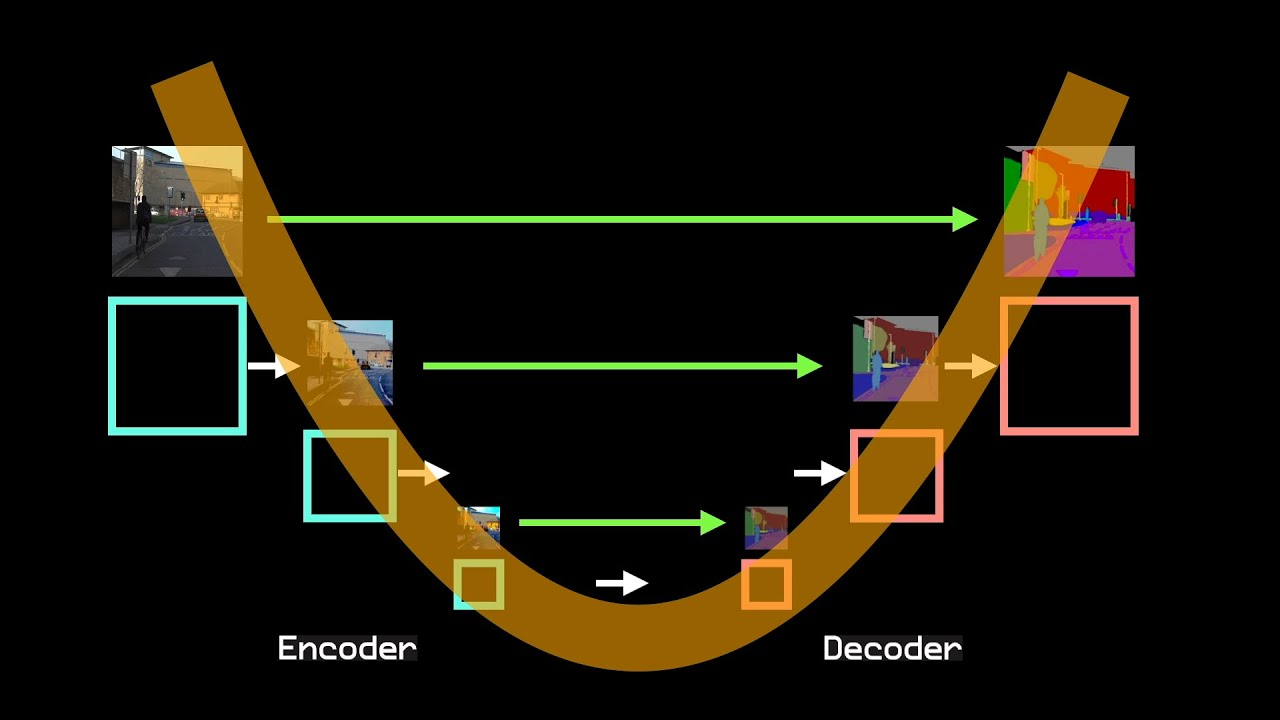

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models   #This imports specific modules from Keras, which is a high-level API for building neural networks on top of TensorFlow.

#Defining the U-Net Architecture.
def build_unet(input_shape):
    inputs = layers.Input(input_shape)

    # Encoder (Downsampling)
    conv1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D((2, 2))(conv1)

    conv2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling2D((2, 2))(conv2)

    conv3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = layers.MaxPooling2D((2, 2))(conv3)

    # Bottleneck     #captures the most abstract and high-level features of the input
    conv4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(conv4)

    # Decoder (Upsampling)
    up5 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv4)
    up5 = layers.concatenate([up5, conv3])
    conv5 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(up5)
    conv5 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(conv5)

    up6 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv5)
    up6 = layers.concatenate([up6, conv2])
    conv6 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(up6)
    conv6 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv6)

    up7 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv6)
    up7 = layers.concatenate([up7, conv1])
    conv7 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(up7)
    conv7 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv7)

    # Output layer
    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(conv7)

    model = models.Model(inputs, outputs)
    return model

# Define input shape (e.g., 128x128 RGB images)
input_shape = (128, 128, 3)
model = build_unet(input_shape)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 128, 128, 64)   │          1,792 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 128, 128, 64)   │         36,928 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 64, 64, 64)     │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 64, 64, 128)    │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 64, 64, 128)    │        147,584 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 32, 32, 128)    │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 32, 32, 256)    │        295,168 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 32, 32, 256)    │        590,080 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 16, 16, 256)    │              0 │ conv2d_5[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 16, 16, 512)    │      1,180,160 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 16, 16, 512)    │      2,359,808 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose          │ (None, 32, 32, 256)    │        524,544 │ conv2d_7[0][0]         │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 32, 32, 512)    │              0 │ conv2d_transpose[0][0… │
│                           │                        │                │ conv2d_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 32, 32, 256)    │      1,179,904 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 32, 32, 256)    │        590,080 │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_1        │ (None, 64, 64, 128)    │        131,200 │ conv2d_9[0][0]         │
│ (Conv2DTranspose)    

 Total params: 7,697,345 (29.36 MB)

 Trainable params: 7,697,345 (29.36 MB)

 Non-trainable params: 0 (0.00 B)

#**Model Training**


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1198s 48s/step - accuracy: 0.9184 - loss: 0.4271 - val_accuracy: 0.9408 - val_loss: 0.2263
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1259s 49s/step - accuracy: 0.9429 - loss: 0.2114 - val_accuracy: 0.9408 - val_loss: 0.2055
Epoch 3/10
23/25 ━━━━━━━━━━━━━━━━━━━━ 1:33 47s/step - accuracy: 0.9430 - loss: 0.1910

#**Model Evaluation**

In [ ]:
# Save the model using the Keras format
model.save('/content/drive/MyDrive/Colab Notebooks/Lane Detection with CNN/lane_detection_unet.keras')


# Load the model (if needed)
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Lane Detection with CNN/lane_detection_unet.keras')

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Lane Detection with CNN/lane_detection_unet.keras')

# Re-compile the model to rebuild metrics
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#**Model Testing on New Images**

In [ ]:
def predict_lane(image, model,color=(0, 255, 0)):
    # Preprocess the image
    image_resized = cv2.resize(image, (128, 128))
    image_normalized = image_resized / 255.0
    image_input = np.expand_dims(image_normalized, axis=0)  # Add batch dimension

    # Predict lane lines
    prediction = model.predict(image_input)
    prediction_mask = (prediction > 0.5).astype(np.uint8)  # Threshold to binary mask

    # Resize mask to original image size
    prediction_mask_resized = cv2.resize(prediction_mask[0], (image.shape[1], image.shape[0]))

    return prediction_mask_resized


# Load a new image
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Lane Detection with CNN/frames/0313-1_10220.jpg')

# Predict lane lines
lane_mask = predict_lane(image, model)

# Overlay lane mask on the original image
result = cv2.addWeighted(image, 0.8, cv2.cvtColor(lane_mask * 255, cv2.COLOR_GRAY2BGR), 1, 0)

# # Display the result
# plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
# plt.axis('off')
# plt.show()

# Display the input and output images side-by-side
plt.figure(figsize=(10, 5))  # Adjust figure size as needed

plt.subplot(1, 2, 1)  # Create a subplot for the input image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Input Image')
plt.axis('off')

plt.subplot(1, 2, 2)  # Create a subplot for the output image
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Output Image (with Lane Overlay)')
plt.axis('off')

plt.show()

In [ ]:
#Real-Time Lane Detection in Videos
# from google.colab.patches import cv2_imshow
# # Load the trained model
# model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Lane Detection with CNN/lane_detection_unet.keras')

# # Open video capture
# cap = cv2.VideoCapture('/content/drive/MyDrive/Colab Notebooks/Lane Detection with CNN/sxxi11.mp4')

# while cap.isOpened():
#     ret, frame = cap.read()
#     if not ret:
#         break

#     # Predict lane lines
#     lane_mask = predict_lane(frame, model)

#     # Overlay lane mask on the frame
#     result = cv2.addWeighted(frame, 0.8, cv2.cvtColor(lane_mask * 255, cv2.COLOR_GRAY2BGR), 1, 0)

#     # Display the result
#     cv2_imshow(result)
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# cap.release()
# cv2.destroyAllWindows()